In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [3]:
np.random.seed(42)

In [4]:
# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [5]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

In [6]:
# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

In [7]:
df

0           1
0    484.891555  -31.006357
1    489.391178   21.973916
2    462.886575  -27.599889
3    517.218479    5.588090
4    455.669049    1.982181
..          ...         ...
295 -229.000000 -504.000000
296  392.000000 -580.000000
297  134.000000  525.000000
298  469.000000 -535.000000
299    2.000000  587.000000

[2300 rows x 2 columns]

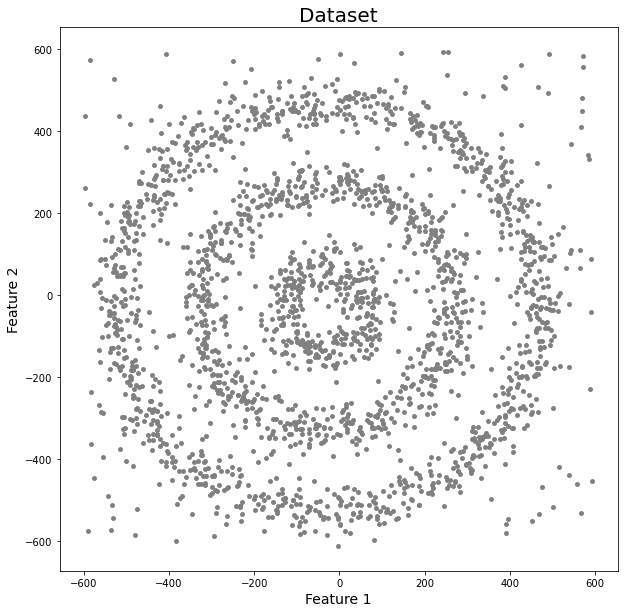

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


1. K-Means
We’ll first start with K-Means because it is the easiest clustering algorithm

In [9]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
df['KMeans_labels']=k_means.labels_

In [11]:
import matplotlib.pyplot as plt

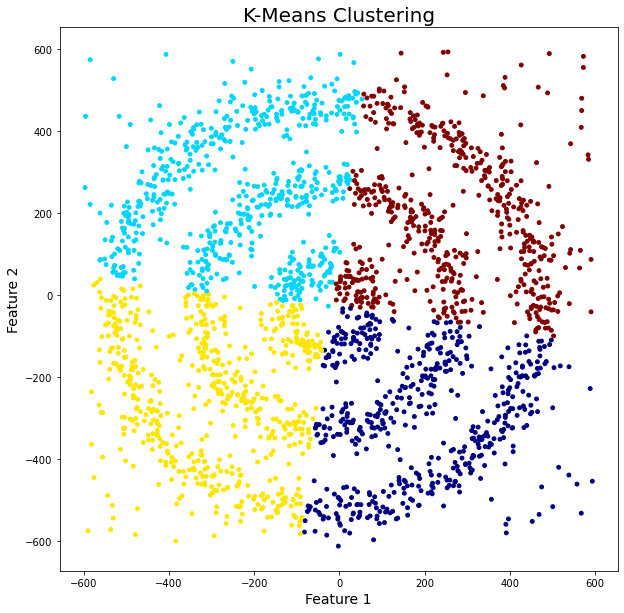

In [12]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap='jet',s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Now, it’s time to implement DBSCAN and see its power. Import DBSCAN from sklearn.cluster. Let’s first run DBSCAN without any parameter optimization and see the results.

In [13]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

In [14]:
#Here, epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model:
df['DBSCAN_labels']=dbscan.labels_

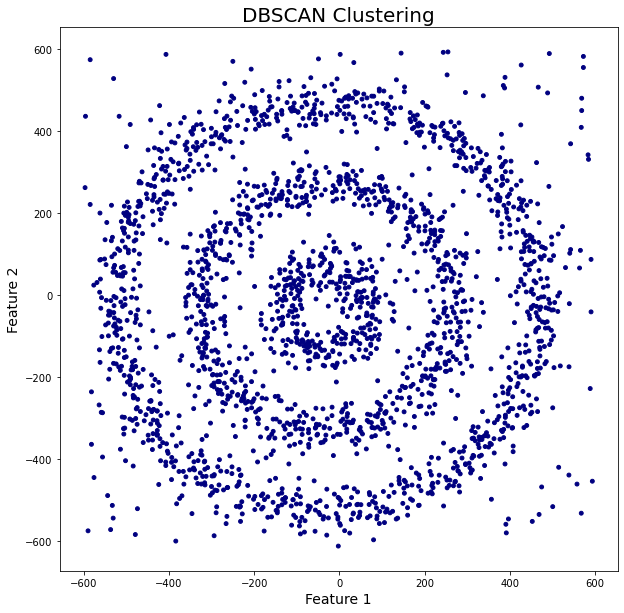

In [15]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap='jet',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Interesting! All the data points are now of purple color which means they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.
For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [16]:
from sklearn.neighbors import NearestNeighbors
#two it is the parameter n_neighbors becuase it includes the point itself and its nearest data point for all data points in the dataset.
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

In [20]:
#we can see that the first column is the indices of the first values sorted in ascending order and the second column is the closest point 
#index s of the second point. 
indices

array([[   0,  993],
       [   1, 2237],
       [   2,    5],
       ...,
       [2297,  210],
       [2298, 2139],
       [2299, 2059]], dtype=int64)

In [36]:
df

0           1  KMeans_labels  DBSCAN_labels
0    484.891555  -31.006357              3             -1
1    489.391178   21.973916              3             -1
2    462.886575  -27.599889              3             -1
3    517.218479    5.588090              3             -1
4    455.669049    1.982181              3             -1
..          ...         ...            ...            ...
295 -229.000000 -504.000000              2             -1
296  392.000000 -580.000000              0             -1
297  134.000000  525.000000              3             -1
298  469.000000 -535.000000              0             -1
299    2.000000  587.000000              1             -1

[2300 rows x 4 columns]

In [37]:
df[0].min()

-597.0

In [35]:
df.shape

(2300, 4)

In [34]:
indices.shape

(2300, 2)

In [32]:
#the first value is 0 because the distance to the point itself is always cero. 
distances

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

In [33]:
distances[:,1]

array([ 6.91861074, 10.80836526,  7.56030267, ..., 25.77071121,
       23.34523506, 37.73592453])

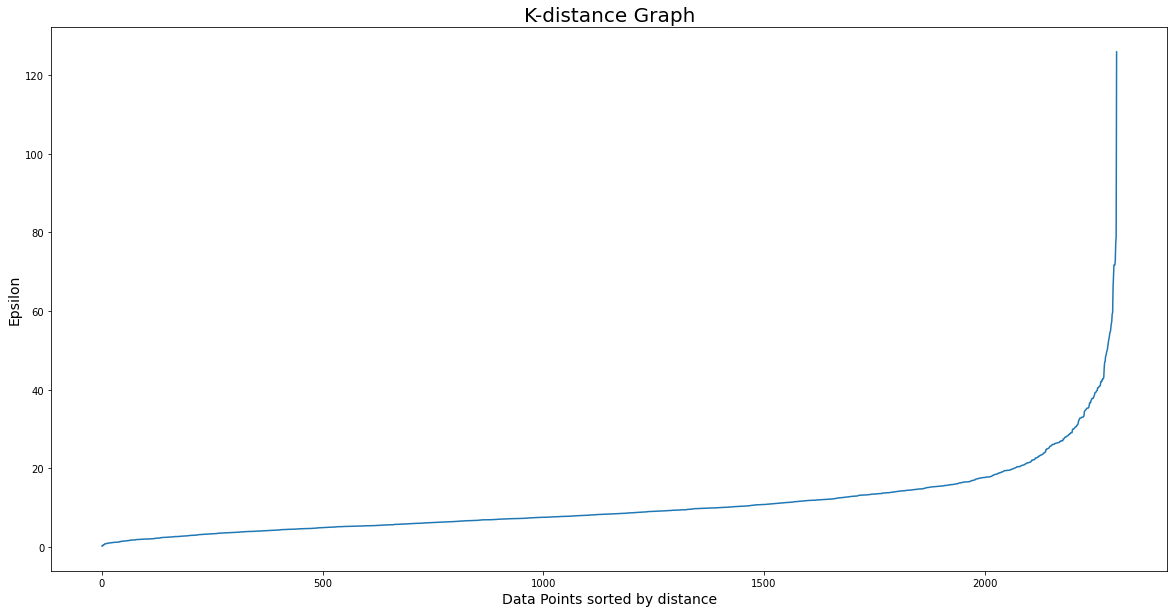

In [38]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case. Now, it’s time to find the value of minPoints. The value of minPoints also depends on domain knowledge. This time I am taking minPoints as 6:

In [45]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [46]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

# The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0, 1 and 2 are the three different clusters, and -1 is the noise. Let’s plot the results and see what we get.

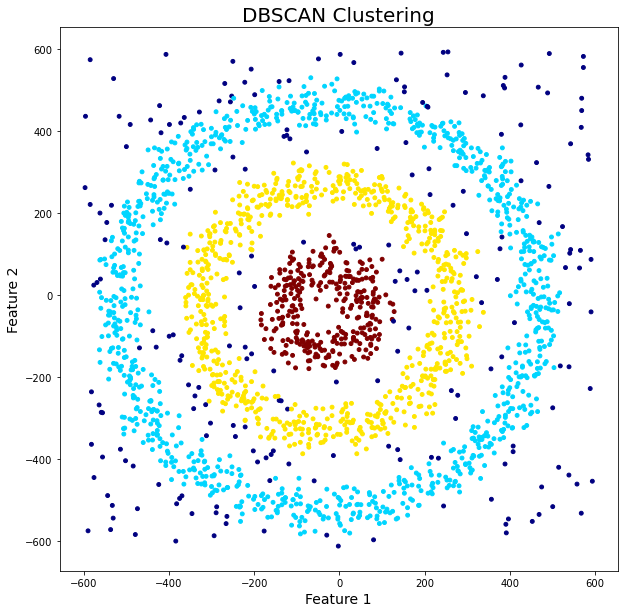

In [47]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap='jet',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

One thing important to note here is that, though DBSCAN creates clusters based on varying densities, it struggles with clusters of similar densities. Also, as the dimension of data increases, it becomes difficult for DBSCAN to create clusters and it falls prey to the Curse of Dimensionality.

In [21]:
import pandas as pd # for data manipulation

from sklearn.cluster import DBSCAN # for building a clustering model
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn import metrics # for calculating Silhouette score

import matplotlib.pyplot as plt # for data visualization
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

In [22]:
# Read in data
df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Real estate.csv')
# Print dataframe
df

No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 8 columns]

In [23]:
# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['X3 distance to the nearest MRT station'], y=df['X2 house age'], z=df['Y house price of unit area'], 
                 opacity=1, color_discrete_sequence=['black'], height=900, width=900)

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

plot distributions for our three features: 

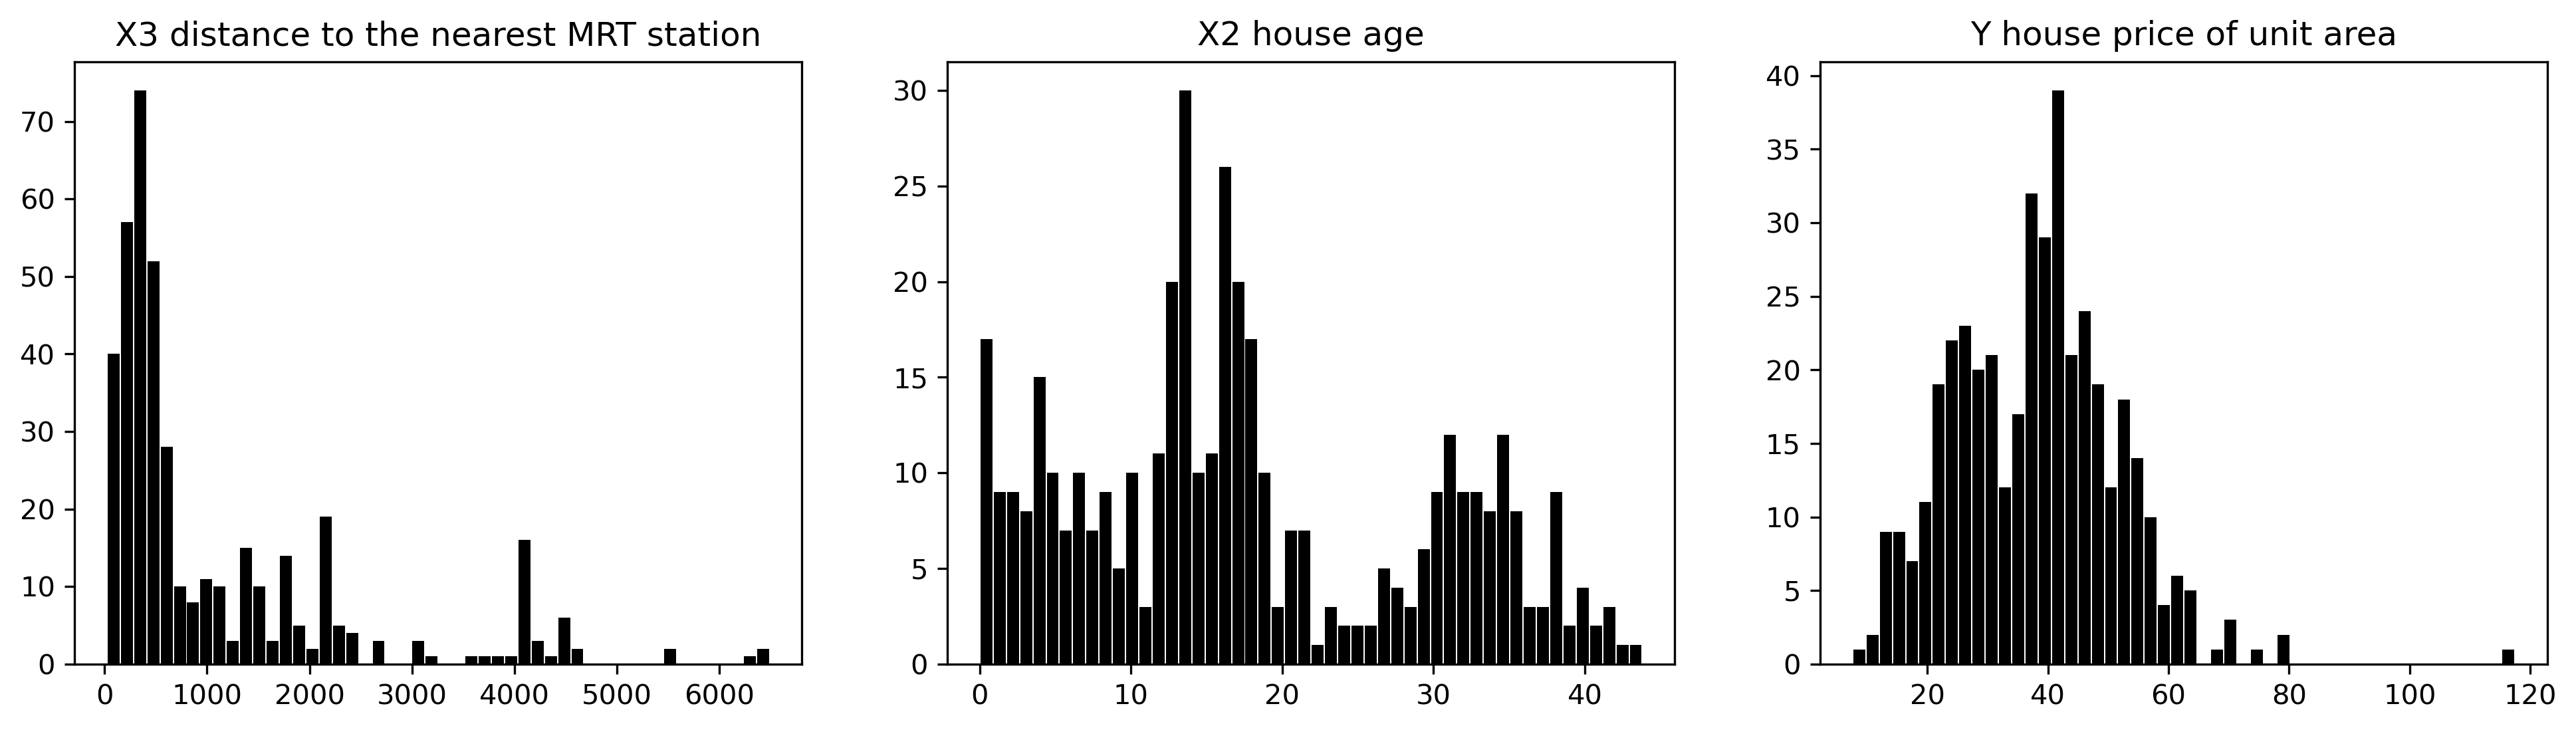

In [24]:
# Select data
X = df[['X3 distance to the nearest MRT station','X2 house age', 'Y house price of unit area']]

# Plot distribution charts
fig, axs = plt.subplots(1, 3, figsize=(16,4), dpi=300)
axs[0].hist(X.iloc[:,0], bins=50, color='black', rwidth=0.9)
axs[0].set_title('X3 distance to the nearest MRT station')
axs[1].hist(X.iloc[:,1], bins=50, color='black', rwidth=0.9)
axs[1].set_title('X2 house age')
axs[2].hist(X.iloc[:,2], bins=50, color='black', rwidth=0.9)
axs[2].set_title('Y house price of unit area')
plt.show()

Scaling is done when your feature distributions have a very different range. E.g., in this example, the distance from the nearest MRT station ranges between 0 and 6,488, while house age ranges from 0 to 44. So they need to be scaled to fit them into the same range.

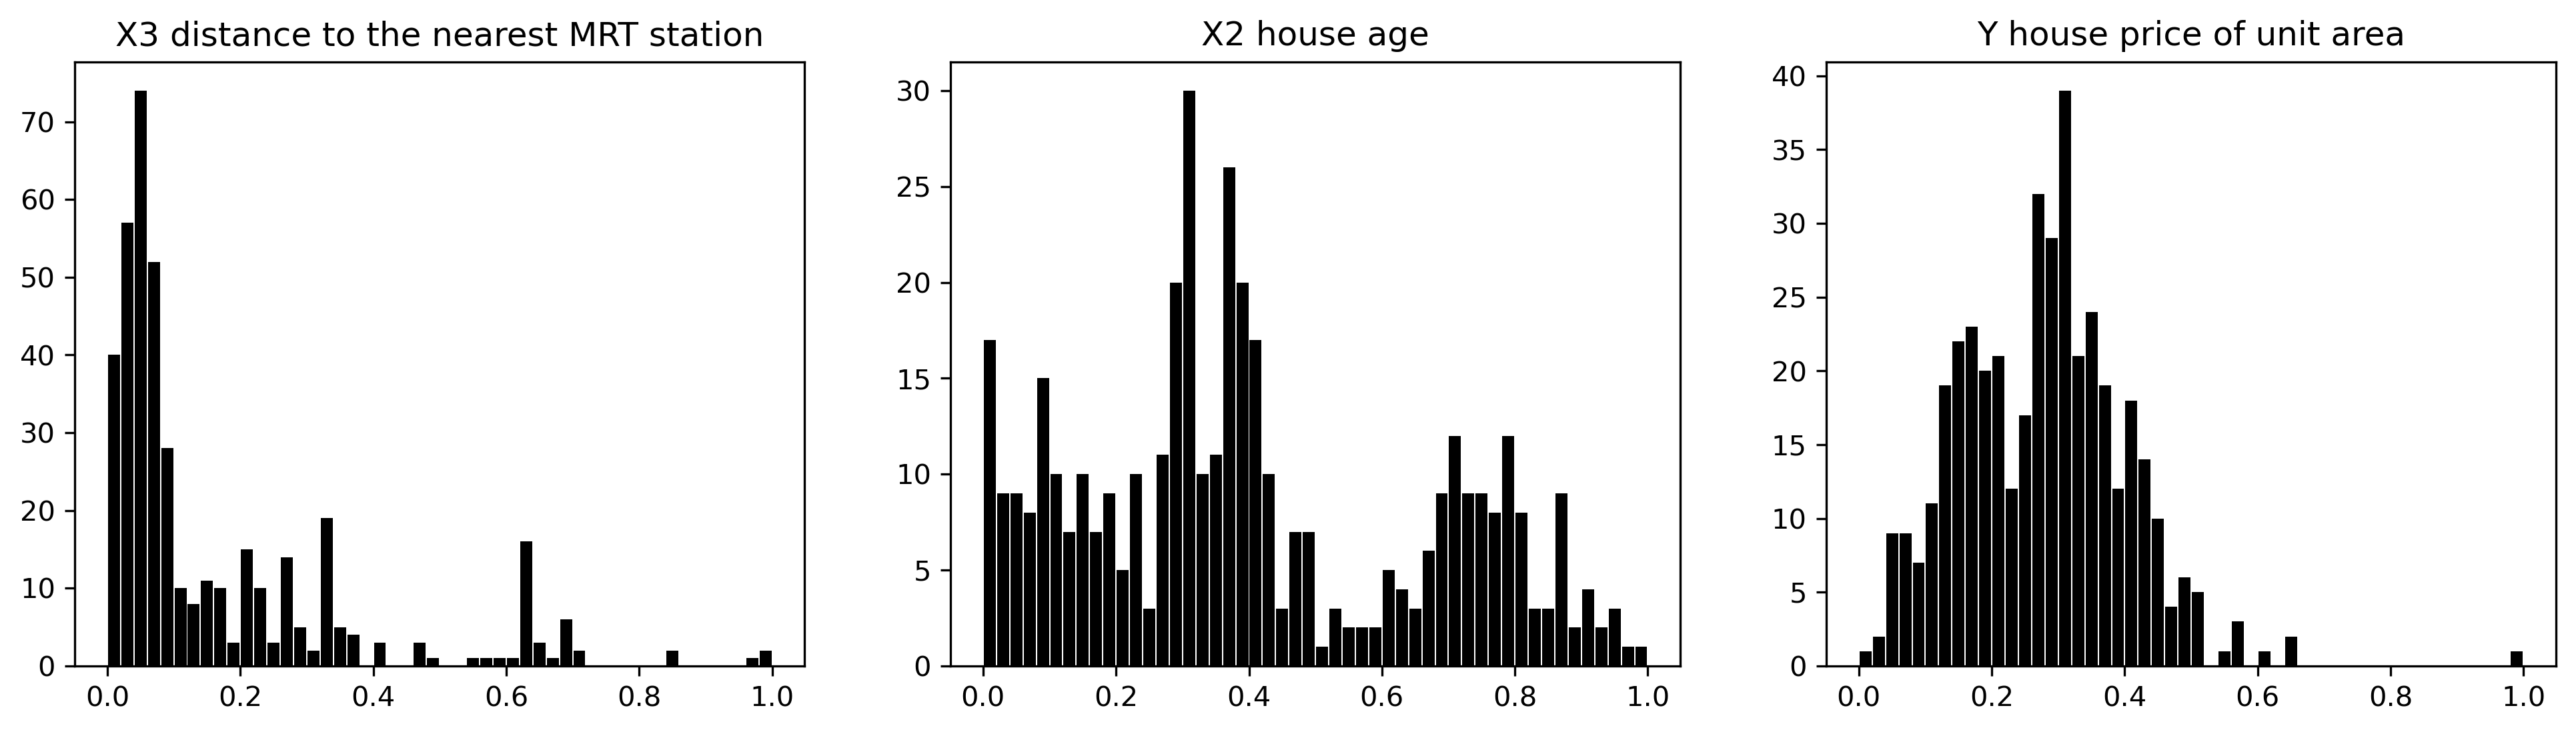

In [25]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Plot distribution charts
fig, axs = plt.subplots(1, 3, figsize=(16,4), dpi=300)
axs[0].hist(X_scaled[:,0], bins=50, color='black', rwidth=0.9)
axs[0].set_title('X3 distance to the nearest MRT station')
axs[1].hist(X_scaled[:,1], bins=50, color='black', rwidth=0.9)
axs[1].set_title('X2 house age')
axs[2].hist(X_scaled[:,2], bins=50, color='black', rwidth=0.9)
axs[2].set_title('Y house price of unit area')
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_17848/1378527297.py:21: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.



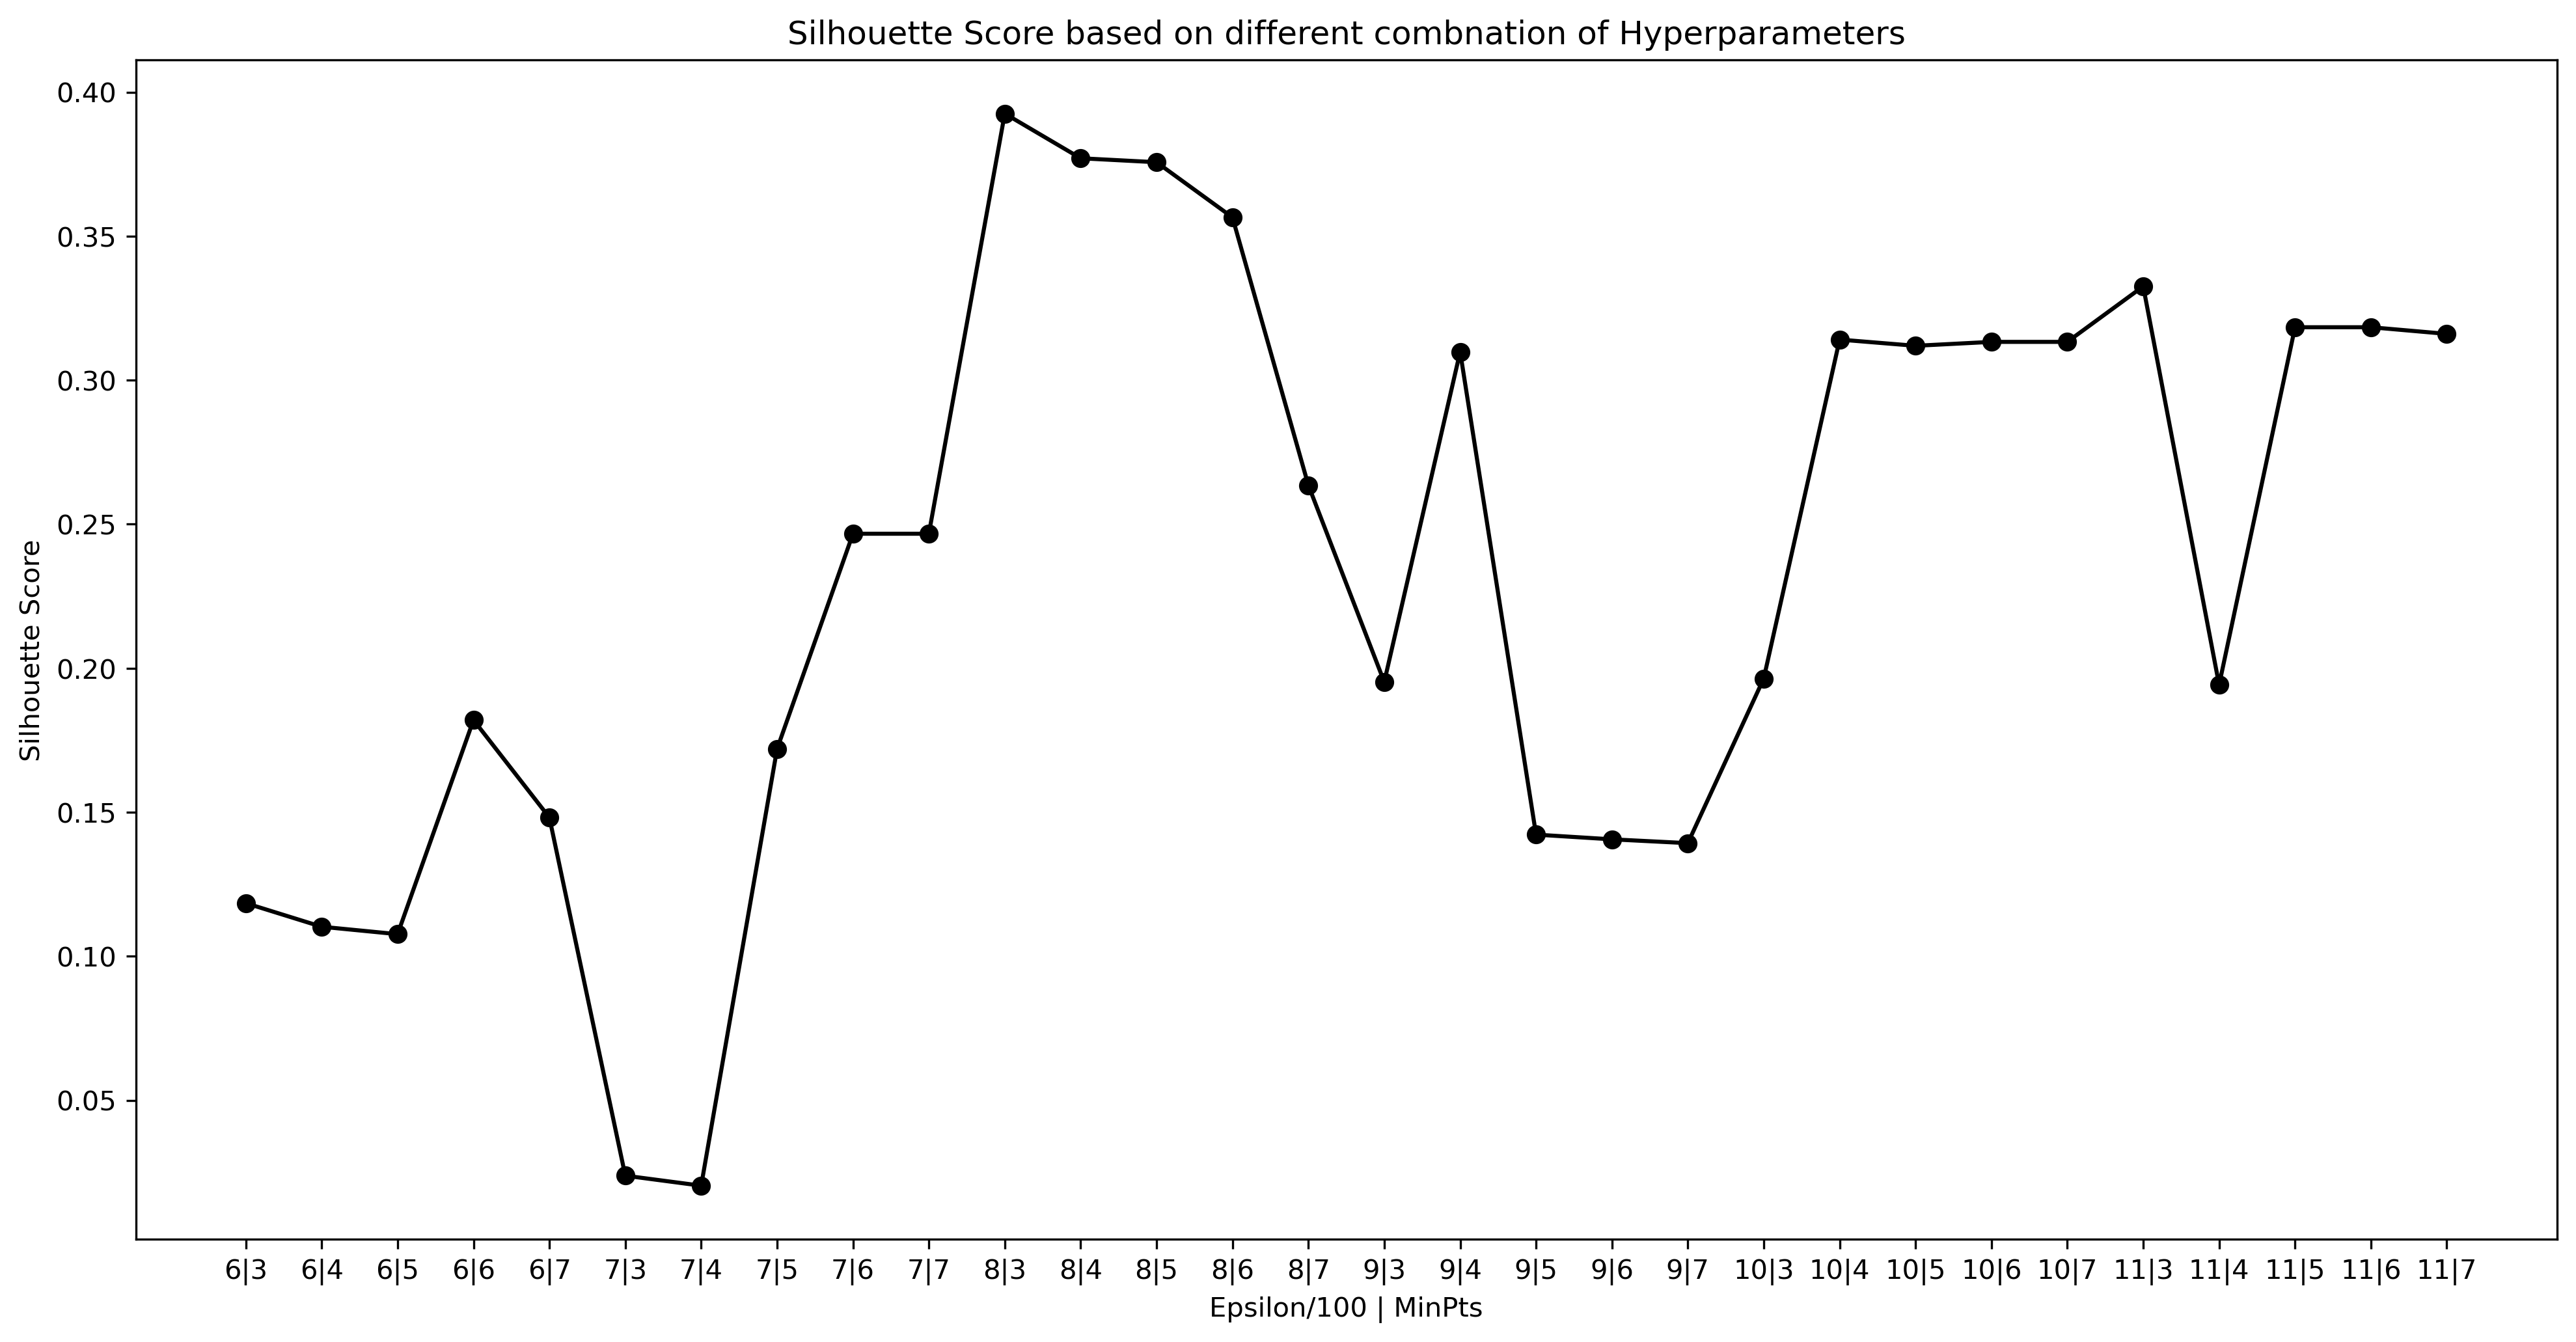

In [26]:
# Create empty lists
S=[] # this is to store Silhouette scores
comb=[] # this is to store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(6,12) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(3,8)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k/100, min_samples=j)
        # Fit the model 
        clm = model.fit(X_scaled)
        # Calculate Silhoutte Score and append to a list
        S.append(metrics.silhouette_score(X_scaled, clm.labels_, metric='euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()

In [27]:
comb

['6|3',
 '6|4',
 '6|5',
 '6|6',
 '6|7',
 '7|3',
 '7|4',
 '7|5',
 '7|6',
 '7|7',
 '8|3',
 '8|4',
 '8|5',
 '8|6',
 '8|7',
 '9|3',
 '9|4',
 '9|5',
 '9|6',
 '9|7',
 '10|3',
 '10|4',
 '10|5',
 '10|6',
 '10|7',
 '11|3',
 '11|4',
 '11|5',
 '11|6',
 '11|7']

Looking at the above, we can see that eps=0.08 and  MinPts=3 produce the highest scores.

We will pick two different combinations to illustrate how the results vary on the choice of hyperparameters. We will use eps=0.08 and MinPts=3 for the first model and eps=0.06 and MinPts=6 for the second model, which is not the optimal.

In [28]:
# ------- DBSCAN -------
# Set up model parameters 

# First model: eps=0.08, MinPts=3
model83 = DBSCAN(eps=0.08, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=3, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=None, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

In [29]:
# Second model: eps=0.06, MinPts=6
model66 = DBSCAN(eps=0.06, min_samples=6) # note, as above this uses default value for other parameters"

In [30]:
# Fit the models
clm83 = model83.fit(X_scaled)
clm66 = model66.fit(X_scaled)

In [31]:
# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(clm83.labels_)
print("Cluster labels for the second model")
print(clm66.labels_)

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[ 0  1  1  1  1  1  0  1 -1  1  0  1  1  1  1  0  1  1  1  1  1  1  1  1
  0  0  1  1  1  1  2  0  0  1  1  3  1  1  1  1  3  3  0  0  1  0  1 -1
  2  2  1  0  0  1  1  0  0  1 -1  1  1  1  1  1  1  0  1  1  0  1  1  0
  0  3  1  1  0  1  0  1  1  0  1 -1  1  1  1  3  1 -1  1  1  1  0  0  1
  1  0  1  1  1  1  1  1  0  1  1  1  0  1  1  0  1 -1  0  1 -1  3 -1  1
  1  1  0  1  1  1 -1  1  4  0  0  1  0  1  0  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  0  0  1  1  1  3  3  0  1  1  1  1  1  3  1  1  1  1  0
  0  1  2  1  1  0  1  0  3  0  1  1  2  1  1  3  1  0  1 -1  0  3  0  1
  0  1  3  1  1  0  0  1  1  1  0  1  1  1  1  0  1  0  1  1  1  1  1  1
  0  0  1  0 -1  1  0  1  0  1  3  0 -1  0  1  3  2  0  1  1  1  1  1  1
  1  1  1  0  1  1  1  1  1 -1  0  0  1  0  1 -1  1  1  1  1  1  1  1  1
  0  1  1  0  1  1 -1  1  1  1  0  1  1  1  1  1  1  1  1  0  1  0  1  1
  1  1  0  1  1  1  0  1  1  0  3

In [32]:
unique_vals = np.unique(clm83.labels_)

In [33]:
unique83, counts83 = np.unique(clm83.labels_, return_counts=True)

In [34]:
print(unique83)
print(counts83)

[-1  0  1  2  3  4]
[ 21  97 265   7  21   3]


In [35]:
unique66, count66 = np.unique(clm66.labels_, return_counts=True)

In [36]:
print(unique66)
print(count66)

[-1  0  1  2  3  4  5  6  7]
[ 68  76 169  46  13  18  11   7   6]


You can immediately see that the first model (eps=0.08, MinPts=3) has fewer clusters, with clusters 0 and 1 being much larger than others. Meanwhile, the second model (eps=0.06, MinPts=6) produced many more clusters, which directly resulted from choosing smaller epsilon.

# SMALLER EPSILON CREATES MORE CLUSTERS

In [37]:
df['DBSCAN Clusters 83']=clm83.labels_
df['DBSCAN Clusters 66']=clm66.labels_
df

No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  \
0       24.98298     121.54024                        37.9   
1       24.98034     121.53951                        42.2   
2       24.98746     121.54391                        47.3   
3       24.98746     121.54391                        54.8   
4       24.97937     121.54245                        43.1   
..           ...           ...                         ...   
409     24.94155     121.50381                        15.4   
410     24.97433     121.54310                        50.0   
411     24.97923     121.53986                        40.6   
412     24.96674     121.54067                        52.5   
413     24.97433     121.54310                        63.9   

     DBSCAN Clusters 83  DBSCAN Clusters 66  
0                     0                   0  
1                     1                   1  
2                     1                   1  
3                     1                   1  
4                     1                   1  
..                  ...                 ...  
409                   3                   4  
410                   1                   1  
411                   1                   1  
412                   1                   1  
413                   1                   1  

[414 rows x 10 columns]

In [40]:
# Sort the dataframe so clusters in the legend follow the number order
df=df.sort_values(by=['DBSCAN Clusters 83'])

# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['X3 distance to the nearest MRT station'], y=df['X2 house age'], z=df['Y house price of unit area'], 
                    opacity=1, color=df['DBSCAN Clusters 83'].astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    hover_data=['X5 latitude', 'X6 longitude'],
                    width=900, height=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=0.04, xanchor="left", x=0.1),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))
# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [39]:
# Sort the dataframe so clusters in the legend follow the number order
df=df.sort_values(by=['DBSCAN Clusters 66'])

# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['X3 distance to the nearest MRT station'], y=df['X2 house age'], z=df['Y house price of unit area'], 
                    opacity=1, color=df['DBSCAN Clusters 66'].astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    hover_data=['X5 latitude', 'X6 longitude'],
                    width=900, height=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=0.04, xanchor="left", x=0.1),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))
# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [42]:
from sklearn.metrics import silhouette_score

The first model is a better clustering model comparing the silhouette_scores. However both scores are low, 

In [44]:
s_score = silhouette_score(X_scaled, clm83.labels_)
print(f"Silhouette coefficient 83: {s_score:.3f}")

Silhouette coefficient 83: 0.393


In [46]:
s_score_66 = silhouette_score(X_scaled, clm66.labels_)
print(f"Silhouette coefficient 66: {s_score_66:.3f}")

Silhouette coefficient 66: 0.182


# As you can see, the second model has further split the two big clusters into a few smaller ones. The formation of the two big clusters in the first model was driven by most houses being located close to the MRT station (see the distribution plot). While we mentioned that we could use log-transformation to spread out these observations, we took a different approach in the second model and reduced the epsilon value instead.

In [77]:
# import pandas
import pandas as pd

# read data from UCI Machine learning Repository 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(url)
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [79]:
df.describe().T

count          mean           std   min      25%     50%  \
Channel           440.0      1.322727      0.468052   1.0     1.00     1.0   
Region            440.0      2.543182      0.774272   1.0     2.00     3.0   
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Channel               2.00       2.0  
Region                3.00       3.0  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicassen         1820.25   47943.0

The descriptive statistics display that all the variables are continuous except for ‘Channel’ and ‘Region’.

In [80]:
features = df.drop(['Channel','Region'],axis=1)
features.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

<AxesSubplot:>

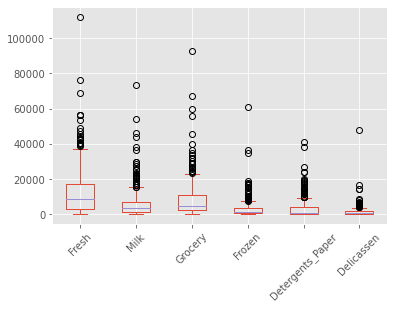

In [81]:
import matplotlib.pyplot as plt

# set the plotting style to 'ggplot'
plt.style.use('ggplot')

# use pandas to create a box plot
features.plot.box(rot=45)

Text(0, 0.5, 'Milk (m.u.)')

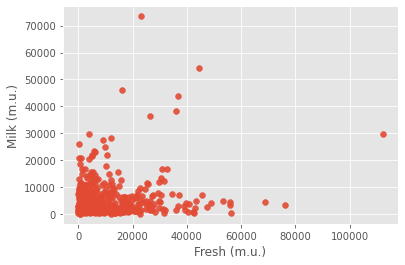

In [82]:
plt.scatter(features.Fresh, features.Milk, s=35, alpha=0.9)
plt.xlabel('Fresh (m.u.)')
plt.ylabel('Milk (m.u.)')

From the above result, it is seen that there are two clear clusters: the normal one and outliers.

Standardizing the data ensures that all features are on the same scale and have the same influence on the clustering algorithm. We use StandardScaler() function in scikit-learn to standardize the selected features.

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

ε: The value of ε determines the radius of the neighborhood around each point. Points within this radius are considered as part of the same cluster. A larger ε will result in fewer clusters, while a smaller ε will result in more clusters. One way to determine the appropriate value of ε is to use a k-distance plot, which plots the distance to the k-th nearest neighbor for each point in the dataset. The value of ε can be chosen as the distance corresponding to a knee or elbow point in the plot.
MinPts: The value of MinPts determines the minimum number of points required for a cluster to be formed. A larger MinPts will result in fewer clusters, while a smaller MinPts will result in more clusters. A common rule of thumb is to set MinPts equal to the dimensionality of the dataset plus one (i.e., MinPts = d + 1), where d is the number of dimensions in the dataset. The second common rule of thumb for setting the value is that if the dataset has two dimensions, the minimum number of points required to form a cluster (i.e., min_samples) should be set to 4. If the dataset has more than two dimensions, the minimum number of points required to form a cluster should be set to twice the number of dimensions in the dataset (i.e., min_samples = 2 * d).

n practice, it may be necessary to experiment with different values of these parameters and evaluate the quality of the resulting clusters using metrics such as silhouette score 

In [84]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [85]:
indices

array([[  0,   5],
       [  1, 244],
       [  2, 218],
       [  3, 278],
       [  4,  36],
       [  5, 281],
       [  6,  84],
       [  7, 415],
       [  8,  55],
       [  9, 306],
       [ 10, 346],
       [ 11, 394],
       [ 12,  14],
       [ 13,  67],
       [ 14, 335],
       [ 15, 199],
       [ 16, 175],
       [ 17, 372],
       [ 18, 127],
       [ 19, 297],
       [ 20, 300],
       [ 21, 326],
       [ 22,  40],
       [ 23, 171],
       [ 24,   4],
       [ 25,   6],
       [ 26, 115],
       [ 27,  58],
       [ 28,  45],
       [ 29, 129],
       [ 30,  18],
       [ 31, 386],
       [ 32, 432],
       [ 33, 276],
       [ 34, 362],
       [ 35, 214],
       [ 36,  89],
       [ 37, 426],
       [ 38, 301],
       [ 39, 258],
       [ 40,  22],
       [ 41,  20],
       [ 42, 268],
       [ 43, 205],
       [ 44, 221],
       [ 45,  28],
       [ 46, 306],
       [ 47,  61],
       [ 48, 298],
       [ 49, 163],
       [ 50,  64],
       [ 51,   8],
       [ 52,

the first distance is 0 because it's the distance to the same point value. 

In [86]:
distances

array([[ 0.        ,  0.46098501],
       [ 0.        ,  0.34363739],
       [ 0.        ,  1.14424502],
       [ 0.        ,  0.32193368],
       [ 0.        ,  0.81980385],
       [ 0.        ,  0.39751095],
       [ 0.        ,  0.34271218],
       [ 0.        ,  0.30537987],
       [ 0.        ,  0.24101484],
       [ 0.        ,  0.4458863 ],
       [ 0.        ,  0.55646534],
       [ 0.        ,  0.17770256],
       [ 0.        ,  0.77328812],
       [ 0.        ,  0.54828334],
       [ 0.        ,  0.52268968],
       [ 0.        ,  0.2732436 ],
       [ 0.        ,  0.28556562],
       [ 0.        ,  0.40142637],
       [ 0.        ,  0.41860312],
       [ 0.        ,  0.40879483],
       [ 0.        ,  0.32860237],
       [ 0.        ,  0.17753441],
       [ 0.        ,  0.89470417],
       [ 0.        ,  4.62909095],
       [ 0.        ,  1.11479524],
       [ 0.        ,  0.43841226],
       [ 0.        ,  0.15707717],
       [ 0.        ,  0.22438604],
       [ 0.        ,

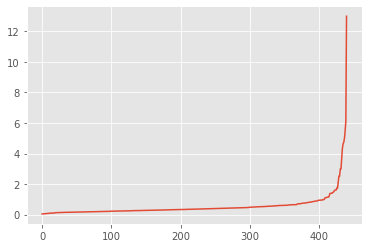

In [87]:
import numpy as np

distances = np.sort(distances[:,1])
plt.plot(distances)

In [88]:
!pip install kneed

Finally, we use the KneeLocator function from the kneed package to find the elbow point in the curve, which corresponds to the optimal value of epsilon for DBSCAN clustering.

In [89]:
from kneed import KneeLocator

kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve="convex", direction="increasing")
optimal_epsilon = distances[kneedle.knee]
print("Optimal epsilon: ", optimal_epsilon)

Optimal epsilon:  1.6070889053161401


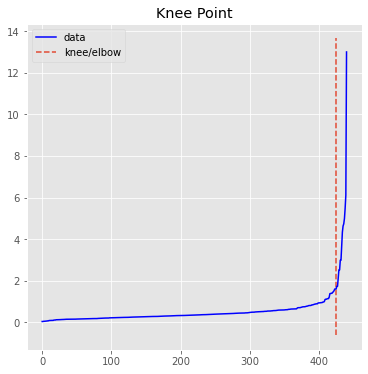

In [90]:
kneedle.plot_knee()
plt.show()

Using the Silhouette Score

Determine MinPts
We use the second common rule of thumb for setting the value of MinPts. This rule is based on the observation that as the dimensionality of the data increases, the density of the data decreases, and it becomes more difficult to identify meaningful clusters. By setting min_samples to a higher value in high-dimensional datasets, we can ensure that the resulting clusters are more robust and have a higher level of statistical significance.

In [96]:
d = 6
min_samples = 2*d

Apply DBSCAN to cluster the data
Then DBSCAN method will be applied to cluster the data based on the selected features. In this example, we have set ε=1.6 and MinPts=12.

In [97]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.6, min_samples=min_samples).fit(X)

In [98]:
labels = dbscan.labels_  # or
# labels = dbscan.fit_predict(X)

labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [100]:
unique, counts = np.unique(labels, return_counts=True)

In [101]:
print(unique)
print(counts)

[-1  0]
[ 30 410]


As the first scaterr plot suggests we have one cluster and the other one with outliers. 

In [102]:
n_noise_ = list(labels).count(-1)

In [104]:
#30 outliers. 
n_noise_

30

In [105]:
from sklearn import metrics
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Silhouette Coefficient: 0.646


In [106]:
# add the cluster labels on the result DateFrame
results = features
results['Clusters'] = dbscan.labels_

results.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Clusters
0  12669  9656     7561     214              2674        1338         0
1   7057  9810     9568    1762              3293        1776         0
2   6353  8808     7684    2405              3516        7844         0
3  13265  1196     4221    6404               507        1788         0
4  22615  5410     7198    3915              1777        5185         0

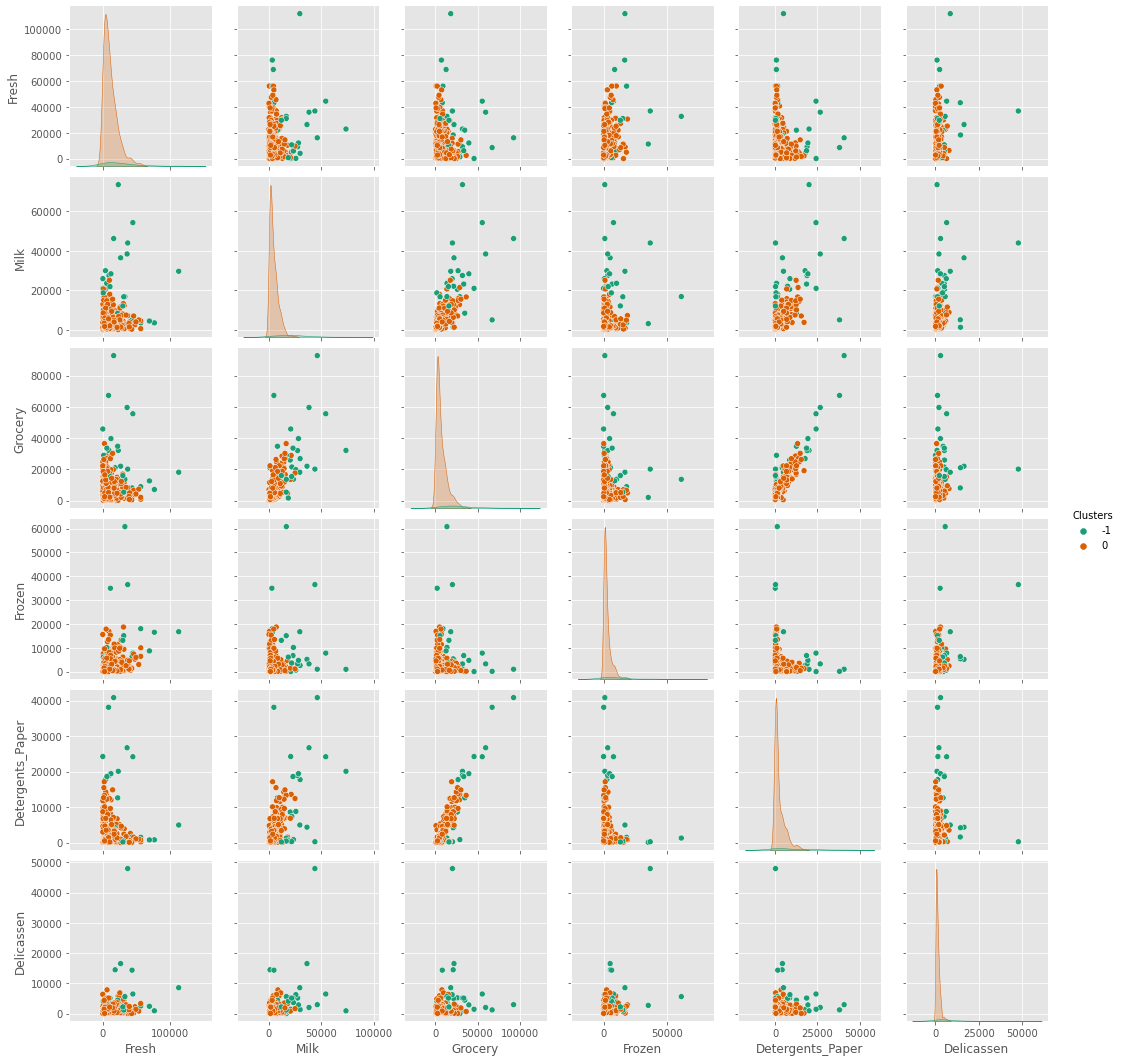

In [107]:
import seaborn as sns

# Create a scatterplot matrix
sns.pairplot(results, hue='Clusters', palette='Dark2')

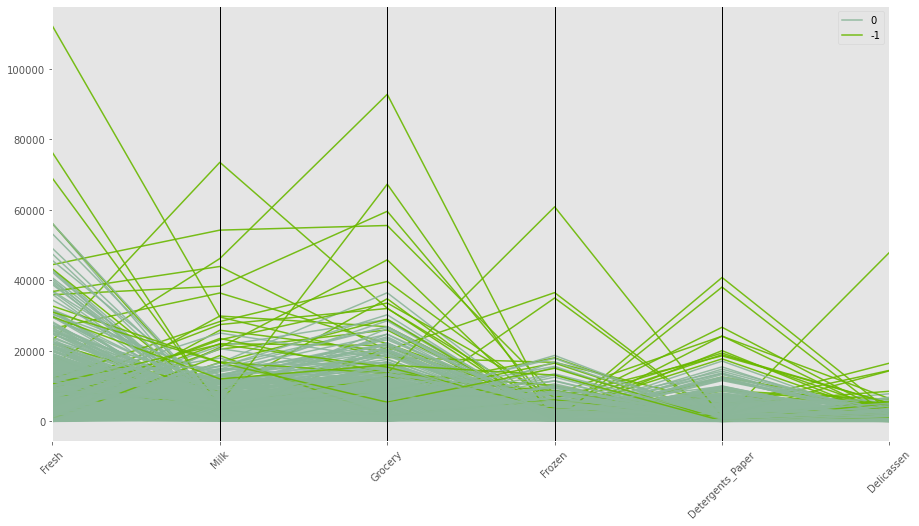

In [108]:
plt.figure(figsize=(15,8))
pd.plotting.parallel_coordinates(results,'Clusters',alpha=0.90)

plt.xticks(rotation=45)
plt.show()

In [109]:
results_mean = results.groupby(['Clusters']).mean()
results_mean.reset_index(inplace=True)

results_mean

Clusters         Fresh          Milk       Grocery       Frozen  \
0        -1  25096.066667  22697.600000  26748.900000  9739.500000   
1         0  11042.070732   4559.582927   6575.841463  2584.060976   

   Detergents_Paper   Delicassen  
0      10293.533333  6083.100000  
1       2339.148780  1191.341463

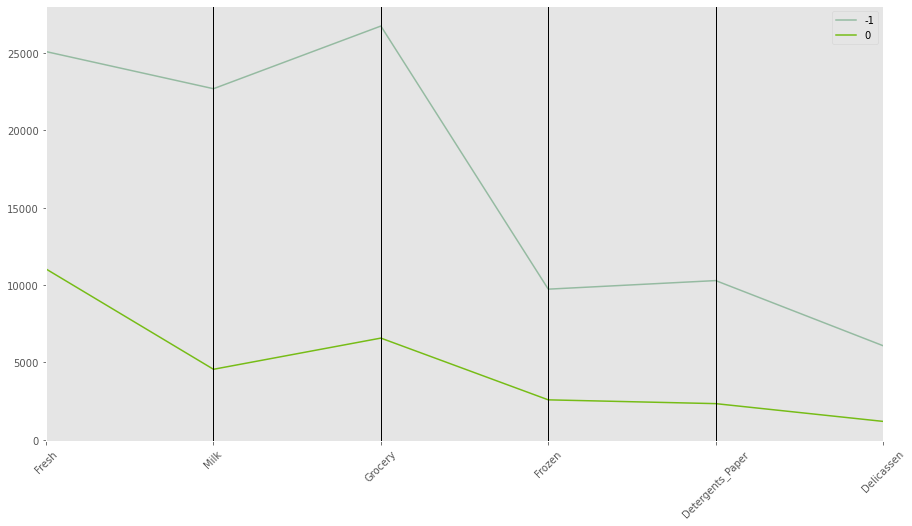

In [110]:
plt.figure(figsize=(15,8))
pd.plotting.parallel_coordinates(results_mean,'Clusters',alpha=0.90)

plt.xticks(rotation=45)
plt.show()

# The above result clearly that the spending on each produces in the anomaly cluster (-1) is over 2~5 time higher than the normal group (0). Therefore, wholesalers should pay more attention to this group.

In [111]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/CC GENERAL.csv') 
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [114]:
# Dropping the CUST_ID column from the dataframe
df = df.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
df.fillna(df.mean(), inplace = True)

In [115]:
# Scaling the data to bring all the attributes on same range 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df) 
  
# Normalizing the data for normalized distribution
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array to a DataFrame 
X_normalized = pd.DataFrame(X_normalized)

In [116]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['V1', 'V2']

In [117]:
X_principal

V1        V2
0    -0.489826 -0.679679
1    -0.518791  0.545011
2     0.330885  0.268979
3    -0.482373 -0.092108
4    -0.563289 -0.481916
...        ...       ...
8945  0.328718 -0.198545
8946  0.259862 -0.167657
8947  0.188798 -0.248498
8948 -0.313018 -0.171384
8949  0.012929  0.097872

[8950 rows x 2 columns]

In [129]:
print(X_principal.shape)
print(df.shape)

(8950, 2)
(8950, 18)


In [119]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_principal)
distances, indices = nbrs.kneighbors(X_principal)

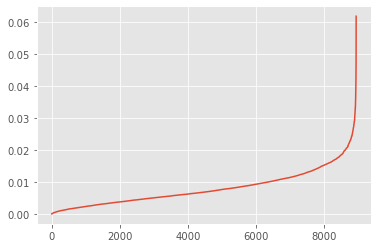

In [120]:
import numpy as np

distances = np.sort(distances[:,1])
plt.plot(distances)

In [121]:
from kneed import KneeLocator

kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve="convex", direction="increasing")
optimal_epsilon = distances[kneedle.knee]
print("Optimal epsilon: ", optimal_epsilon)

Optimal epsilon:  0.024486252272276285


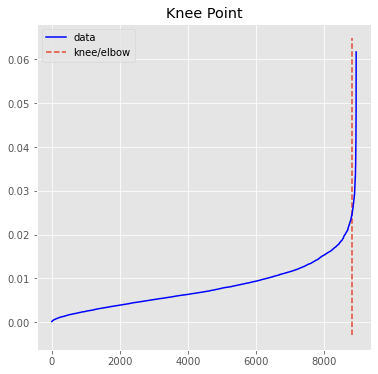

In [122]:
kneedle.plot_knee()
plt.show()

In [126]:
db = DBSCAN(eps = 0.024486, min_samples =4).fit(X_principal) 
labels = db.labels_ 
print(np.unique(labels))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]


In [127]:
df['cluster']=db.labels_
df.tail(20)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8930   229.540018           1.000000      84.00              0.00   
8931    46.814144           0.833333     235.80              0.00   
8932    39.552396           1.000000     180.00              0.00   
8933   735.652303           1.000000     619.60            255.62   
8934    20.260716           0.833333     110.50              0.00   
8935   183.817004           1.000000     465.90              0.00   
8936   108.977282           1.000000     712.50              0.00   
8937   163.001629           0.666667       0.00              0.00   
8938    78.818407           0.500000       0.00              0.00   
8939   728.352548           1.000000     734.40            734.40   
8940   130.838554           1.000000     591.24              0.00   
8941  5967.475270           0.833333     214.55              0.00   
8942    40.829749           1.000000     113.28              0.00   
8943     5.871712           0.500000      20.90             20.90   
8944   193.571722           0.833333    1012.73           1012.73   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8930                   84.00    304.951421             1.000000   
8931                  235.80      0.000000             0.833333   
8932                  180.00      0.000000             1.000000   
8933                  363.98    546.902403             1.000000   
8934                  110.50      0.000000             0.666667   
8935                  465.90      0.000000             1.000000   
8936                  712.50      0.000000             1.000000   
8937                    0.00    274.440466             0.000000   
8938                    0.00   1113.186078             0.000000   
8939                    0.00    239.891038             0.333333   
8940                  591.24      0.000000             1.000000   
8941                  214.55   8555.409326             0.833333   
8942                  113.28      0.000000             1.000000   
8943                    0.00      0.000000             0.166667   
8944                    0.00      0.000000             0.333333   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8930                    0.000000                          0.833333   
8931                    0.000000                          0.666667   
8932                    0.000000                          0.833333   
8933                    0.166667                          0.833333   
8934                    0.000000                          0.500000   
8935                    0.000000                          0.833333   
8936                    0.000000                          0.833333   
8937                    0.000000                          0.000000   
8938                    0.000000                          0.000000   
8939                    0.333333                          0.000000   
8940                    0.000000                          0.833333   
8941                    0.000000                          0.666667   
8942                    0.000000                          0.833333   
8943                    0.166667                          0.000000   
8944                    0.333333                          0.000000   
8945                    0.000000

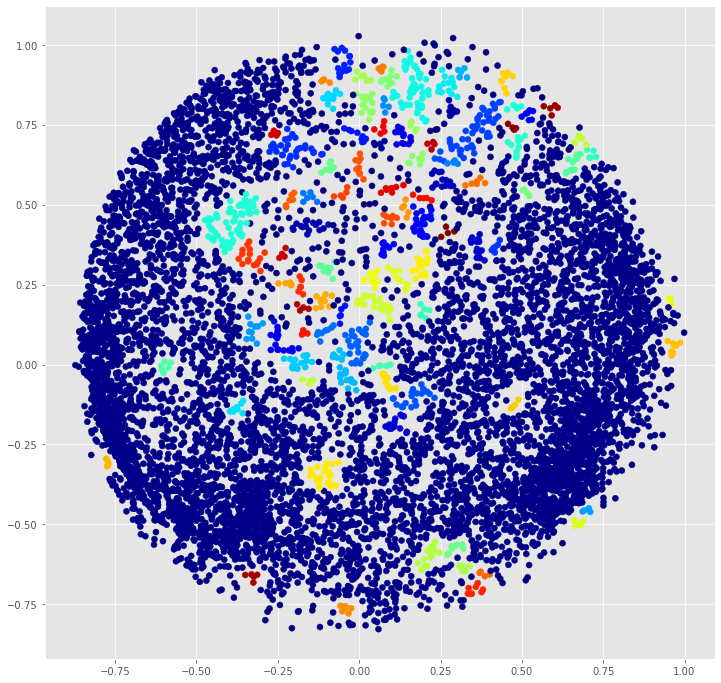

In [130]:
plt.figure(figsize =(12, 12))
plt.scatter(X_principal['V1'], X_principal['V2'], c = df['cluster'],cmap='jet')
plt.show()

In [133]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns

In [135]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [137]:
X.shape

(300, 2)

In [138]:
y.shape

(300,)

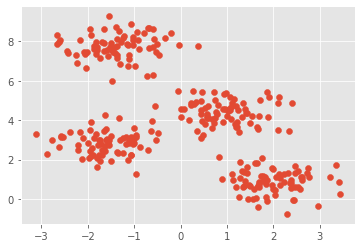

In [139]:
plt.scatter(X[:,0], X[:,1])

# We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [140]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [141]:
indices

array([[  0,   4],
       [  1,  89],
       [  2, 186],
       [  3, 228],
       [  4, 124],
       [  5, 242],
       [  6, 129],
       [  7, 185],
       [  8, 130],
       [  9, 207],
       [ 10, 299],
       [ 11, 140],
       [ 12, 210],
       [ 13,  88],
       [ 14, 154],
       [ 15,  90],
       [ 16, 104],
       [ 17, 221],
       [ 18, 265],
       [ 19, 110],
       [ 20, 240],
       [ 21,  83],
       [ 22, 164],
       [ 23, 299],
       [ 24, 272],
       [ 25, 212],
       [ 26,  91],
       [ 27, 253],
       [ 28, 165],
       [ 29, 147],
       [ 30, 267],
       [ 31, 137],
       [ 32, 181],
       [ 33, 209],
       [ 34, 246],
       [ 35,  66],
       [ 36, 137],
       [ 37, 140],
       [ 38, 272],
       [ 39, 126],
       [ 40,  90],
       [ 41, 194],
       [ 42,  98],
       [ 43, 181],
       [ 44, 131],
       [ 45, 191],
       [ 46, 278],
       [ 47, 206],
       [ 48,  89],
       [ 49, 295],
       [ 50, 262],
       [ 51, 221],
       [ 52,

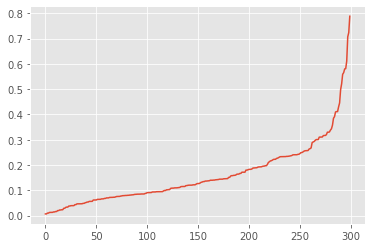

In [142]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

We train our model, selecting 0.3 for eps and setting min_samples to 5.

In [143]:
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X)

DBSCAN(eps=0.3)

In [144]:
clusters = m.labels_

In [146]:
clusters

array([-1,  0,  1,  0, -1, -1, -1,  1, -1,  4,  2, -1,  1, -1, -1,  1,  1,
        3,  2,  8,  3,  3,  1,  2,  2, -1,  3,  1, -1,  1,  7,  0, -1, -1,
        0,  0,  0, -1,  2,  3,  1,  2, -1,  1,  2,  2,  0,  2,  0,  3,  2,
        3,  0,  3, -1,  2, -1, -1,  0,  3,  0,  1, -1,  2,  2,  2,  0,  3,
       -1,  2,  1, -1,  0,  2,  2,  4,  2,  1,  3,  0, -1,  1,  3,  3,  0,
        1,  3,  5, -1,  0,  1,  3, -1,  2,  2,  1,  6,  3, -1, -1,  4, -1,
        7,  3,  1,  3, -1,  1, -1,  1,  8, -1,  3, -1,  3, -1,  0,  3,  6,
       -1, -1,  3, -1,  3,  6,  3,  3,  8,  3,  2, -1,  2,  2, -1,  0,  8,
        9,  0, -1,  7, -1,  2,  1, -1, -1,  2,  0, -1,  0,  0,  0,  1, -1,
        5, 10,  2,  0,  2,  3,  1, -1,  1,  1,  6,  1, -1, -1,  5,  3,  1,
        1,  0,  3, -1, -1,  0,  3,  3,  1,  2,  3,  1,  2,  2,  5,  1,  1,
        1,  3,  0, -1,  2,  1,  1,  2,  2,  9, -1,  2,  0,  1,  2, 10,  2,
        1, -1,  2,  4,  1, -1,  1,  2,  5, -1,  0,  2,  2,  3, -1,  1,  0,
        3,  3,  9, 10,  9

In [147]:
unique, counts = np.unique(clusters, return_counts=True)

In [149]:
len(unique)

12

In [150]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

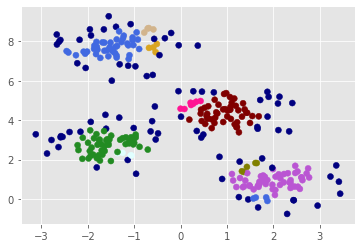

In [151]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/Spending_Score.csv')

In [155]:
data.head(5)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [156]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [158]:
# extracting the above mentioned columns
x = data.loc[:, ['Age','Annual Income (k$)',
                 'Spending Score (1-100)']].values

In [173]:
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

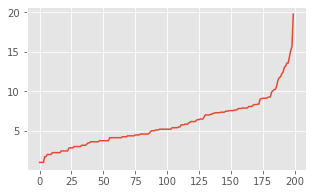

In [174]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

From the above plot, we note the maximum curvature of the curve is about eight, and thus we picked our Eps as 10

In [175]:
dbscan = DBSCAN(eps =10, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

In [176]:
labels

array([-1,  0, -1,  0,  1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0, -1, -1,  1,  0, -1,  0, -1,  0, -1, -1,  1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0, -1, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3, -1,  3,  2,  3, -1,  3,  5,  3, -1,  3,  4,  3,
       -1,  3,  4,  3, -1,  3, -1,  3,  4,  3, -1,  3, -1,  3,  5,  3,  5,
        3,  5,  3, -1,  3, -1,  3, -1,  3,  4,  3, -1,  3,  5,  3,  5, -1,
        5,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
       -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [177]:
unique, counts = np.unique(labels, return_counts=True)

In [178]:
unique

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

In [179]:
counts

array([56, 16,  4, 81, 32,  4,  7], dtype=int64)

In [180]:
len(unique)

7

In [182]:
x[:,0]

array([19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35,
       20, 52, 35, 35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 60, 21, 53, 18,
       49, 21, 42, 30, 36, 20, 65, 24, 48, 31, 49, 24, 50, 27, 29, 31, 49,
       33, 31, 59, 50, 47, 51, 69, 27, 53, 70, 19, 67, 54, 63, 18, 43, 68,
       19, 32, 70, 47, 60, 60, 59, 26, 45, 40, 23, 49, 57, 38, 67, 46, 21,
       48, 55, 22, 34, 50, 68, 18, 48, 40, 32, 24, 47, 27, 48, 20, 23, 49,
       67, 26, 49, 21, 66, 54, 68, 66, 65, 19, 38, 19, 18, 19, 63, 49, 51,
       50, 27, 38, 40, 39, 23, 31, 43, 40, 59, 38, 47, 39, 25, 31, 20, 29,
       44, 32, 19, 35, 57, 32, 28, 32, 25, 28, 48, 32, 34, 34, 43, 39, 44,
       38, 47, 27, 37, 30, 34, 30, 56, 29, 19, 31, 50, 36, 42, 33, 36, 32,
       40, 28, 36, 36, 52, 30, 58, 27, 59, 35, 37, 32, 46, 29, 41, 30, 54,
       28, 41, 36, 34, 32, 33, 38, 47, 35, 45, 32, 32, 30], dtype=int64)

In [184]:
data['Clusters'] = labels

In [185]:
data

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Clusters  
0          -1  
1           0  
2          -1  
3           0  
4           1  
..        ...  
195        -1  
196        -1  
197        -1  
198        -1  
199        -1  

[200 rows x 6 columns]

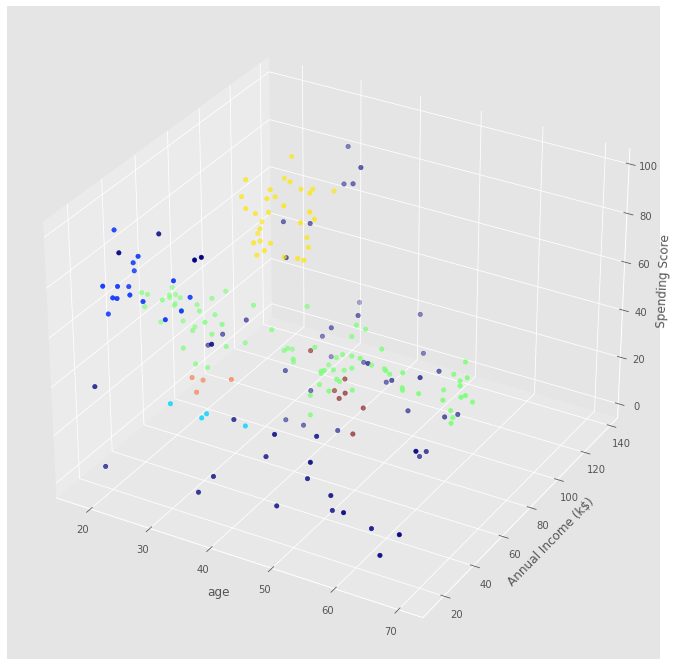

In [193]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(111, projection='3d')

x =data['Age']
y =data['Annual Income (k$)']
z =data['Spending Score (1-100)']

ax.scatter(x, y, z, c=data['Clusters'], marker='o',cmap='jet')

ax.set_xlabel('age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')

plt.show()

In [194]:
grouped_multiple = data.groupby(['Clusters']).mean()
grouped_multiple

CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Clusters                                                                   
-1        110.928571  41.785714           67.017857               32.035714
 0         22.000000  23.750000           25.062500               77.312500
 1         18.000000  35.250000           22.750000               35.250000
 2         84.012346  42.950617           54.432099               49.851852
 3        155.625000  32.750000           80.875000               83.625000
 4        145.500000  20.750000           76.250000                8.000000
 5        156.714286  42.714286           80.714286               17.428571

In [195]:
grouped_multiple.drop(['CustomerID'],axis=1)

Age  Annual Income (k$)  Spending Score (1-100)
Clusters                                                       
-1        41.785714           67.017857               32.035714
 0        23.750000           25.062500               77.312500
 1        35.250000           22.750000               35.250000
 2        42.950617           54.432099               49.851852
 3        32.750000           80.875000               83.625000
 4        20.750000           76.250000                8.000000
 5        42.714286           80.714286               17.428571

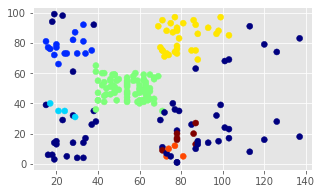

In [196]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Clusters'], marker='o',cmap='jet')

In [197]:
import pandas as pd

# Substitute the path_to_file content by the path to your csv file 
path_to_file = 'C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/hierarchical-clustering-shopping-data.csv'
customer_data = pd.read_csv(path_to_file)
customer_data

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

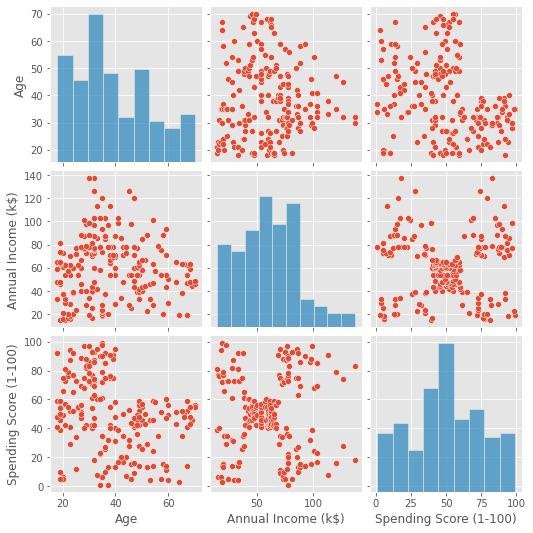

In [198]:
import seaborn as sns

# dropping CustomerID column from data 
customer_data = customer_data.drop('CustomerID', axis=1)

sns.pairplot(customer_data);

When looking at the combination of features produced by pairplot, the graph of Annual Income (k$) with Spending Score (1-100) seems to display around 5 groups of points. 

In [199]:
selected_cols = ['Annual Income (k$)', 'Spending Score (1-100)']
customer_data = customer_data[selected_cols]
customer_data

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

In [200]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # creating the scaler
scaled_data = ss.fit_transform(customer_data)

In [201]:
scaled_customer_data = pd.DataFrame(columns=selected_cols, data=scaled_data)
scaled_customer_data.head()

Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980

After finding the neighbors, we will order their distances from largest to smallest and plot the distances of the y-axis and the points on the x-axis. Looking at the plot, we will find where it resembles the bent of an elbow and the y-axis point that describes that elbow bent is the suggested ε value.

In [208]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nn = NearestNeighbors(n_neighbors=4) # minimum points -1
nbrs = nn.fit(scaled_customer_data)
distances, indices = nbrs.kneighbors(scaled_customer_data)

In [209]:
#indices of the four points. 
indices

array([[  0,   4,  16,  20],
       [  1,   3,  15,   5],
       [  2,   6,   8,  14],
       [  3,   5,  13,   1],
       [  4,   0,  16,  20],
       [  5,   3,  13,  15],
       [  6,   2,   8,  22],
       [  7,  11,  19,  29],
       [  8,   6,   2,  22],
       [  9,   5,  21,  13],
       [ 10,  14,  12,   6],
       [ 11,  19,   7,  33],
       [ 12,  10,  14,  24],
       [ 13,  15,   5,   3],
       [ 14,  10,  12,   6],
       [ 15,  13,   5,   3],
       [ 16,  20,  18,   4],
       [ 17,   9,  21,  23],
       [ 18,  26,  20,  28],
       [ 19,  11,   7,  33],
       [ 20,  16,  26,  18],
       [ 21,  23,   9,  13],
       [ 22,  30,   8,   6],
       [ 23,  21,  31,   9],
       [ 24,  34,  36,  14],
       [ 25,  35,  29,  15],
       [ 26,  28,  20,  18],
       [ 27,  17,  43,  45],
       [ 28,  26,  18,  20],
       [ 29,  25,  33,  35],
       [ 30,  32,  22,  24],
       [ 31,  37,  23,  21],
       [ 32,  30,  22,  34],
       [ 33,  41,  29,  35],
       [ 34,  

After finding the distances, we can sort them from largest to smallest. Since the distances array's first column is of the point to itself (meaning all are 0), and the second column contains the smallest distances, followed by the third column which has larger distances than the second, and so on, we can pick only the values of the second column and store them in the distances variable:

In [210]:
distances

array([[0.        , 0.08564307, 0.27669913, 0.37699224],
       [0.        , 0.15990848, 0.20603662, 0.20857963],
       [0.        , 0.07633886, 0.16332841, 0.31170347],
       [0.        , 0.0544428 , 0.15267772, 0.15990848],
       [0.        , 0.08564307, 0.24695814, 0.33025172],
       [0.        , 0.0544428 , 0.12091014, 0.16332841],
       [0.        , 0.07633886, 0.12255989, 0.26999162],
       [0.        , 0.19782504, 0.24604156, 0.50013409],
       [0.        , 0.12255989, 0.16332841, 0.24182028],
       [0.        , 0.17303595, 0.19475561, 0.19782504],
       [0.        , 0.0544428 , 0.0544428 , 0.31290921],
       [0.        , 0.15753602, 0.19782504, 0.59950147],
       [0.        , 0.0544428 , 0.07764312, 0.30781334],
       [0.        , 0.07764312, 0.12091014, 0.15267772],
       [0.        , 0.0544428 , 0.07764312, 0.28226971],
       [0.        , 0.07764312, 0.16332841, 0.17128613],
       [0.        , 0.11450829, 0.24511979, 0.24695814],
       [0.        , 0.24511979,

In [211]:
#if you check the sorted method sorts by the second column first, then the second one and so on. 
distances_sorted = np.sort(distances, axis=0)
distances_sorted

array([[0.        , 0.        , 0.03816943, 0.0544428 ],
       [0.        , 0.        , 0.03816943, 0.0544428 ],
       [0.        , 0.        , 0.03816943, 0.0544428 ],
       [0.        , 0.        , 0.03816943, 0.07633886],
       [0.        , 0.        , 0.03882156, 0.07633886],
       [0.        , 0.        , 0.03882156, 0.07633886],
       [0.        , 0.        , 0.03882156, 0.07633886],
       [0.        , 0.        , 0.03882156, 0.07633886],
       [0.        , 0.03816943, 0.03882156, 0.07764312],
       [0.        , 0.03816943, 0.03882156, 0.07764312],
       [0.        , 0.03816943, 0.03882156, 0.07764312],
       [0.        , 0.03816943, 0.0544428 , 0.07764312],
       [0.        , 0.03816943, 0.0544428 , 0.07764312],
       [0.        , 0.03816943, 0.0544428 , 0.07764312],
       [0.        , 0.03816943, 0.0544428 , 0.07764312],
       [0.        , 0.03816943, 0.0544428 , 0.07764312],
       [0.        , 0.03816943, 0.0544428 , 0.07764312],
       [0.        , 0.03816943,

In [212]:
distances = distances_sorted[:,1] # Choosing only the smallest distances

Now that we have our sorted smallest distances, we can import matplotlib, plot the distances, and draw a red line on where the "elbow bend" is:

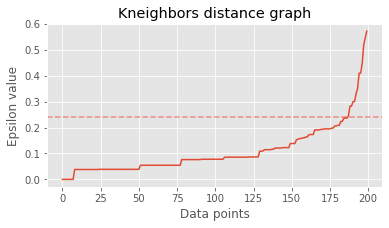

In [213]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.plot(distances)
plt.axhline(y=0.24, color='r', linestyle='--', alpha=0.4) # elbow line
plt.title('Kneighbors distance graph')
plt.xlabel('Data points')
plt.ylabel('Epsilon value')
plt.show();

Note: it is possible that the graph for finding the ε value has either one or more "elbow bents", either big or mini, when that happens, you can find the values, test them and choose those with results that best describe the clusters, either by looking at metrics of plots.

Notice that when drawing the line, we will find out the ε value, in this case, it is 0.24.

We finally have our minimum points and ε. With both variables, we can create and run the DBSCAN model.

In [215]:
from sklearn.cluster import DBSCAN

# min_samples == minimum points ≥ dataset_dimensions + 1
dbs = DBSCAN(eps=0.24, min_samples=5)
dbs.fit(scaled_customer_data)

DBSCAN(eps=0.24)

In [216]:
labels = dbs.labels_

scaled_customer_data['labels'] = labels
scaled_customer_data.head()

Annual Income (k$)  Spending Score (1-100)  labels
0           -1.738999               -0.434801      -1
1           -1.738999                1.195704       0
2           -1.700830               -1.715913      -1
3           -1.700830                1.040418       0
4           -1.662660               -0.395980      -1

In [217]:
unique, counts = np.unique(labels, return_counts=True)

In [218]:
unique

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

In [219]:
counts

array([62,  9, 80, 14, 23,  5,  7], dtype=int64)

62 outliers points. 

In [220]:
total_labels = np.unique(labels)

n_labels = 0
for n in total_labels:
    if n != -1:
        n_labels += 1
print("Number of clusters:", n_labels)

Number of clusters: 6


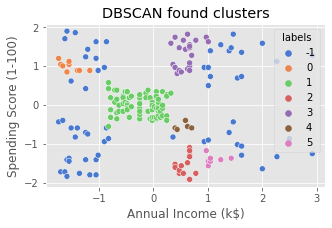

In [221]:
sns.scatterplot(data=scaled_customer_data, 
                x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='labels', palette='muted').set_title('DBSCAN found clusters');

We already know that 62 points of our original data of 200 points were considered noise. This is a lot of noise, which indicates that perhaps the DBSCAN clustering didn't consider many points as part of a cluster.

# We can start to come to a conclusion that DBSCAN was great for capturing the dense areas of the clusters but not so much for identifying the bigger scheme of the data, the 5 clusters' delimitations. It would be interesting to test more clustering algorithms with our data. Let's see if a metric will corroborate this hypothesis.

In [222]:
scaled_customer_data

Annual Income (k$)  Spending Score (1-100)  labels
0             -1.738999               -0.434801      -1
1             -1.738999                1.195704       0
2             -1.700830               -1.715913      -1
3             -1.700830                1.040418       0
4             -1.662660               -0.395980      -1
..                  ...                     ...     ...
195            2.268791                1.118061      -1
196            2.497807               -0.861839      -1
197            2.497807                0.923953      -1
198            2.917671               -1.250054      -1
199            2.917671                1.273347      -1

[200 rows x 3 columns]

# Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.

In [223]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(scaled_customer_data, labels)
print(f"Silhouette coefficient: {s_score:.3f}")

Silhouette coefficient: 0.506


As for its disadvantages, we have seen that it couldn't capture different densities in the same cluster, so it has a hard time with large differences in densities. It is also dependent on the distance metric and scaling of the points. This means that if the data isn't well understood, with differences in scale and with a distance metric that doesn't make sense, it will probably fail to understand it.